## Detección de fracturas de las vértebras cervicales en radiografías


### Integrantes:
- **Sebastián Aristondo Pérez** - *20880*
- **José Daniel Gonzalez Carrillo** - *20293*


## Análisis exploratorio

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [9]:
data = pd.read_csv('train.csv')

In [10]:
data.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [11]:
data.describe()

,patient_overall,C1,C2,C3,C4,C5,C6,C7
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,0.475978,0.072313,0.141159,0.036157,0.053492,0.080238,0.137197,0.194651
std,0.499546,0.259070,0.348272,0.186726,0.225068,0.271728,0.344140,0.396030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.dtypes

StudyInstanceUID    object
patient_overall      int64
C1                   int64
C2                   int64
C3                   int64
C4                   int64
C5                   int64
C6                   int64
C7                   int64
dtype: object

In [19]:
columnas_cervicales =["C1", "C2", "C3", "C4", "C5", "C6", "C7"]
data_cervicales = data[columnas_cervicales]

### Posibles cervicales dañadas
Primero haremos un análisis sobre aquellas radiografías donde se cree que hay una posible fractura en las cervicales. Para esto, se hará un análisis de las radiografías que tienen un valor de distinto a en la columna de cada `cervical`.

In [20]:
incidencia_de_fractura = data_cervicales[data_cervicales !=0].count()
print(incidencia_de_fractura)

C1    146
C2    285
C3     73
C4    108
C5    162
C6    277
C7    393
dtype: int64


### Cervicales dañadas
Ahora veremos aquellas cervicales que en definitiva están dañadas. Para esto, se hará un análisis de las radiografías que tienen un valor de 1 a en la columna de cada `cervical`.


In [21]:
incidencia_de_fractura = data_cervicales[data_cervicales == 1].count()
print(incidencia_de_fractura)

C1    146
C2    285
C3     73
C4    108
C5    162
C6    277
C7    393
dtype: int64


A pesar de que la descripción de los datos nos indica que algunas cervicales pueden tener un valor entre 0 y 1 indicando que hay una `probabilidad` de fractura, podemos ver que el dataset unicamente cuenta con valores de 1 o 0 por lo que no hay fracturas sin diagnosticar.

#### Frecuencia de fractura por cervical

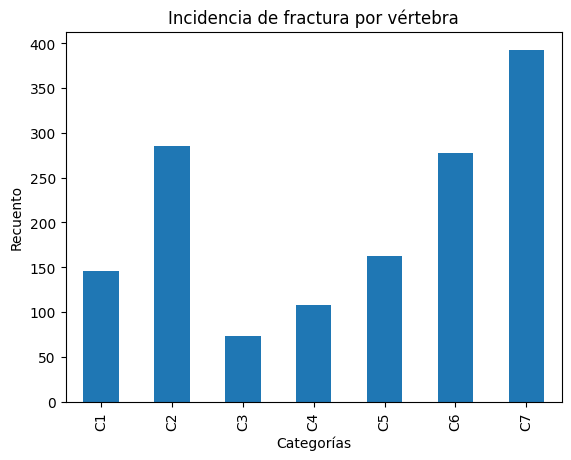

In [45]:
incidencia_de_fractura.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Recuento')
plt.title('Incidencia de fractura por vértebra')

# Mostrar el gráfico
plt.show()

Se puede observar que la mayor cantidad de pacientes tienen una fractura en la séptima vértebra, con más de 400 ocurrencias. La menor cantidad se da en la tercera vértebra, con menos de 100 ocurrencias.

### Observaciones con fracturas
Ahora veremos cuántas observaciones tienen fractura y cuáles no.

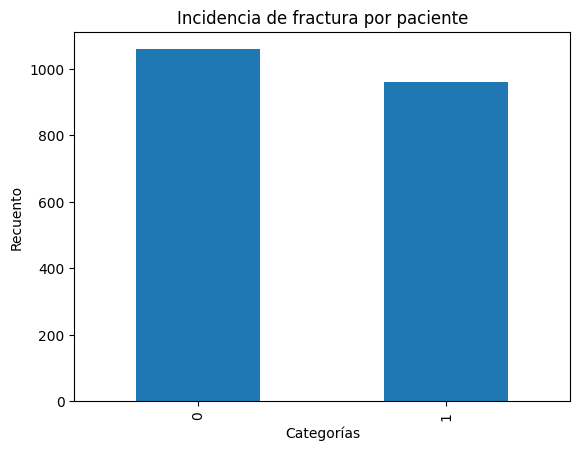

In [46]:
fractura = data['patient_overall'].value_counts()

fractura.plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Recuento')
plt.title('Incidencia de fractura por paciente')

# Mostrar el gráfico
plt.show()

Se puede observar que las observaciones con fractura y las que no tienen fractura están balanceadas.